In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [2]:
def func_for_object(data, name):
    data[name] = data[name].astype(str).apply(
        lambda x: None if x.strip() == '' else x)
    print('as is', data[name].value_counts(), sep='\n')
    if data[name].value_counts()[0]/data.shape[0] > 0.5:
        data[name] = data[name].astype(str).apply(
            lambda x: data[name].value_counts().index[0] if x.strip() == 'nan' else x)
        print('to be', data[name].value_counts(), sep='\n')
        return
    else:
        print('Необходима экспертная оценка')

In [3]:
df = pd.read_csv('stud_math.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
df.shape

(395, 30)

In [6]:
df.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [7]:
df.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [8]:
df.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [9]:
df.address.value_counts()

U    295
R     83
Name: address, dtype: int64

In [10]:
func_for_object(df, 'address')

as is
U      295
R       83
nan     17
Name: address, dtype: int64
to be
U    312
R     83
Name: address, dtype: int64


In [11]:
df.famsize.value_counts()

GT3    261
LE3    107
Name: famsize, dtype: int64

In [12]:
func_for_object(df, 'famsize')

as is
GT3    261
LE3    107
nan     27
Name: famsize, dtype: int64
to be
GT3    288
LE3    107
Name: famsize, dtype: int64


In [13]:
df.Pstatus.value_counts()

T    314
A     36
Name: Pstatus, dtype: int64

In [14]:
func_for_object(df, 'Pstatus')

as is
T      314
nan     45
A       36
Name: Pstatus, dtype: int64
to be
T    359
A     36
Name: Pstatus, dtype: int64


In [15]:
df.Medu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

In [16]:
#групп слишком много, пропусков мало, просто удалим пропуски
df = df.loc[df.Medu >= 0]
df.shape

(392, 30)

In [17]:
df.Fedu.value_counts()

2.0     105
3.0      95
4.0      88
1.0      77
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [18]:
# 40 - это выброс, так как возможные варианты [0, 4], удалим
# однозначно заполнить пропуски не получится, пропустим
df = df.loc[df.Fedu != 40]
df.shape

(391, 30)

In [19]:
df.Mjob.value_counts()

other       131
services     96
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [20]:
# не получится однозначно заполнить, пропустим

In [21]:
df.Fjob.value_counts()

other       195
services    100
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [22]:
# преобладает категория other, ей и заполним пропуски
df.Fjob = df.Fjob.astype(str).apply(lambda x: 'other' if x.strip() == 'nan' else x)
df.Fjob.value_counts()

other       231
services    100
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [23]:
df.reason.value_counts()

course        137
home          103
reputation    100
other          34
Name: reason, dtype: int64

In [24]:
# нельзя однозначно заполнить, пропустим

In [25]:
df.guardian.value_counts()

mother    249
father     83
other      28
Name: guardian, dtype: int64

In [26]:
func_for_object(df, 'guardian')

as is
mother    249
father     83
nan        31
other      28
Name: guardian, dtype: int64
to be
mother    280
father     83
other      28
Name: guardian, dtype: int64


In [27]:
df.traveltime.value_counts()

1.0    239
2.0     96
3.0     21
4.0      7
Name: traveltime, dtype: int64

In [28]:
func_for_object(df, 'traveltime')

as is
1.0    239
2.0     96
nan     28
3.0     21
4.0      7
Name: traveltime, dtype: int64
to be
1.0    267
2.0     96
3.0     21
4.0      7
Name: traveltime, dtype: int64


In [29]:
df.studytime.value_counts()

2.0    192
1.0    102
3.0     63
4.0     27
Name: studytime, dtype: int64

In [30]:
# преобладает категория 2, ей и заполним пропуски
df.studytime = df.studytime.astype(str).apply(lambda x: '2.0' if x.strip() == 'nan' else x)
df.studytime.value_counts()

2.0    199
1.0    102
3.0     63
4.0     27
Name: studytime, dtype: int64

In [31]:
df.failures.value_counts()

0.0    290
1.0     48
2.0     16
3.0     15
Name: failures, dtype: int64

In [32]:
func_for_object(df, 'failures')

as is
0.0    290
1.0     48
nan     22
2.0     16
3.0     15
Name: failures, dtype: int64
to be
0.0    312
1.0     48
2.0     16
3.0     15
Name: failures, dtype: int64


In [33]:
df.schoolsup.value_counts()

no     332
yes     50
Name: schoolsup, dtype: int64

In [34]:
func_for_object(df, 'schoolsup')

as is
no     332
yes     50
nan      9
Name: schoolsup, dtype: int64
to be
no     341
yes     50
Name: schoolsup, dtype: int64


In [35]:
df.famsup.value_counts()

yes    216
no     136
Name: famsup, dtype: int64

In [36]:
func_for_object(df, 'famsup')

as is
yes    216
no     136
nan     39
Name: famsup, dtype: int64
to be
yes    255
no     136
Name: famsup, dtype: int64


In [37]:
df.paid.value_counts()

no     196
yes    155
Name: paid, dtype: int64

In [38]:
df.paid = df.paid.astype(str).apply(lambda x: 'no' if x.strip() == 'nan' else x)
df.paid.value_counts()

no     236
yes    155
Name: paid, dtype: int64

In [39]:
df.activities.value_counts()

yes    193
no     184
Name: activities, dtype: int64

In [40]:
# Результаты разделились почти пополам, нельзя однозначно заполнить, пропустим

In [41]:
df.nursery.value_counts()

yes    296
no      79
Name: nursery, dtype: int64

In [42]:
func_for_object(df, 'nursery')

as is
yes    296
no      79
nan     16
Name: nursery, dtype: int64
to be
yes    312
no      79
Name: nursery, dtype: int64


In [43]:
# 'studytime, granular' этого столбца нет в описании, считаем ошибкой, удалим

-6.0     192
-3.0     102
-9.0      63
-12.0     27
Name: studytime, granular, dtype: int64

In [45]:
df.drop(columns = ['studytime, granular'])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,...,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,...,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,...,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [46]:
df.higher.value_counts()

yes    353
no      18
Name: higher, dtype: int64

In [47]:
func_for_object(df, 'higher')

as is
yes    353
nan     20
no      18
Name: higher, dtype: int64
to be
yes    373
no      18
Name: higher, dtype: int64


In [48]:
df.internet.value_counts()

yes    303
no      55
Name: internet, dtype: int64

In [49]:
func_for_object(df, 'internet')

as is
yes    303
no      55
nan     33
Name: internet, dtype: int64
to be
yes    336
no      55
Name: internet, dtype: int64


In [50]:
df.romantic.value_counts()

no     237
yes    124
Name: romantic, dtype: int64

In [51]:
func_for_object(df, 'romantic')

as is
no     237
yes    124
nan     30
Name: romantic, dtype: int64
to be
no     267
yes    124
Name: romantic, dtype: int64


In [52]:
df.famrel.value_counts()

 4.0    181
 5.0     97
 3.0     61
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [53]:
# -1 - выброс, уберем
df = df.loc[df.famrel != -1]
df.shape

(390, 30)

In [54]:
df.freetime.value_counts()

3.0    151
4.0    112
2.0     61
5.0     37
1.0     18
Name: freetime, dtype: int64

In [55]:
# нет однозначного ответа, просто удалим пропуски
df = df.loc[df.freetime >= 0]
df.shape

(379, 30)

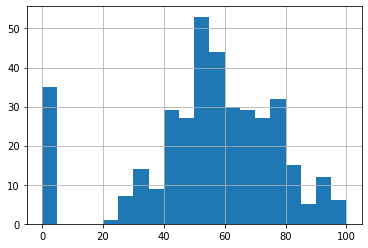

In [59]:
df.score.hist(bins = 20)

In [60]:
# часть с 20 до 100 похожа на нормальное распределение, посмотрим, на квантили

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


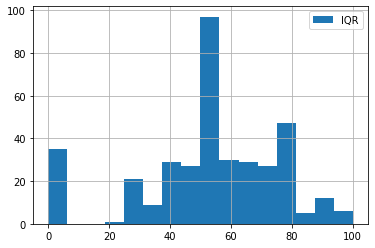

In [64]:
IQR = df.score.quantile(0.75) - df.score.quantile(0.25)
perc25 = df.score.quantile(0.25)
perc75 = df.score.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
df.score.loc[df.score.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (0, 100), label = 'IQR')
 
plt.legend();

In [65]:
#квантили говорят, что 0 - не выброс, значит, оставим